In [3]:
import pandas as pd


# Load the uploaded CSV file
file_path = 'C:/Users/ashut/Downloads/equipment_data (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Timestamp,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
0,01-01-2019 00:00,0.548793,0.509840,0.619918,0.741161,1,0.501129,0.499619
1,01-01-2019 01:00,0.715185,0.587573,0.802121,0.292862,1,0.584882,0.538630
2,01-01-2019 02:00,0.602748,0.294453,0.965546,0.624416,1,0.444534,0.352514
3,01-01-2019 03:00,0.544862,0.500041,0.519955,0.931955,0,0.471992,0.602794
4,01-01-2019 04:00,0.423622,0.031649,0.323663,0.799867,0,0.440103,0.264552


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the feature columns and the target variable
feature_columns = ["Temperature (°C)", "Vibration (mm/s)", "Pressure (Pa)", "RPM", "Temp_Change", "Vib_Change"]
target_column = "Maintenance Required"

# Separate the features and the target
X = data[feature_columns]
y = data[target_column]

# Normalize the feature columns
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (35040, 6)
Testing features shape: (8760, 6)
Training labels shape: (35040,)
Testing labels shape: (8760,)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

# Dictionary to store model performance
performance = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the performance metrics
    performance[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print the classification report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display the performance metrics
for model_name, metrics in performance.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      4356
           1       0.50      0.51      0.51      4404

    accuracy                           0.50      8760
   macro avg       0.50      0.50      0.50      8760
weighted avg       0.50      0.50      0.50      8760



Model: Decision Tree
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      4356
           1       0.50      0.49      0.50      4404

    accuracy                           0.50      8760
   macro avg       0.50      0.50      0.50      8760
weighted avg       0.50      0.50      0.50      8760



Model: Random Forest
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      4356
           1       0.51      0.49      0.50      4404

    accuracy                           0.51      8760
   macro avg       0.51      0.51      0.51      8760
w

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define a smaller parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],         # Number of trees in the forest
    'max_depth': [10, 20, None],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
}

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10,      # Number of different combinations to try (less exhaustive)
    cv=3,           # 3-fold cross-validation
    random_state=42, 
    n_jobs=-1,      # Use all available cores
    verbose=1, 
    scoring='f1'    # Optimize for F1 Score
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1 Score from Random Search:", best_score)

# Train the final model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_best_rf = best_rf.predict(X_test)

print("Final Model Performance with Tuned Hyperparameters")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Best F1 Score from Random Search: 0.513573794582713
Final Model Performance with Tuned Hyperparameters
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      4356
           1       0.52      0.53      0.53      4404

    accuracy                           0.51      8760
   macro avg       0.51      0.51      0.51      8760
weighted avg       0.51      0.51      0.51      8760



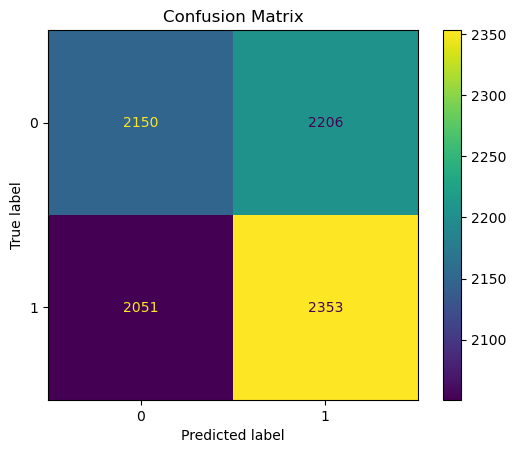

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


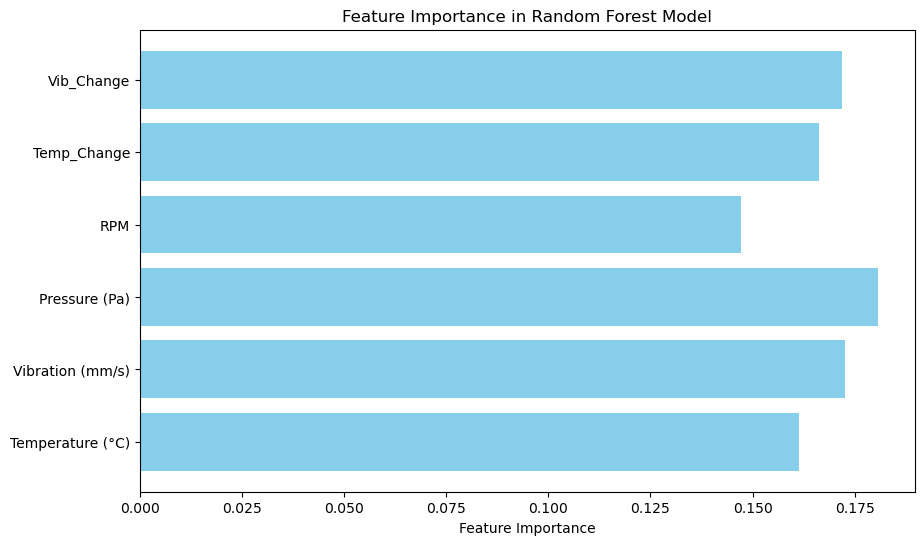

In [8]:
# Check feature importance (for tree-based models)
feature_importance = best_rf.feature_importances_
feature_names = ["Temperature (°C)", "Vibration (mm/s)", "Pressure (Pa)", "RPM", "Temp_Change", "Vib_Change"]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()
